# K-means & Hierarchical clustering

In [142]:
import numpy as np
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt
import scipy.cluster.hierarchy as shc

from sklearn import metrics
from sklearn.cluster import KMeans
from sklearn.decomposition import PCA 
from sklearn.metrics import silhouette_score
from sklearn.cluster import SpectralClustering
from sklearn.cluster import AgglomerativeClustering
from sklearn.preprocessing import StandardScaler, normalize


In [3]:
data=pd.read_csv("CC GENERAL.csv")
data

,CUST_ID,BALANCE,BALANCE_FREQUENCY,PURCHASES,ONEOFF_PURCHASES,INSTALLMENTS_PURCHASES,CASH_ADVANCE,PURCHASES_FREQUENCY,ONEOFF_PURCHASES_FREQUENCY,PURCHASES_INSTALLMENTS_FREQUENCY,CASH_ADVANCE_FREQUENCY,CASH_ADVANCE_TRX,PURCHASES_TRX,CREDIT_LIMIT,PAYMENTS,MINIMUM_PAYMENTS,PRC_FULL_PAYMENT,TENURE
0,C10001,40.900749,0.818182,95.40,0.00,95.40,0.000000,0.166667,0.000000,0.083333,0.000000,0,2,1000.0,201.802084,139.509787,0.000000,12
1,C10002,3202.467416,0.909091,0.00,0.00,0.00,6442.945483,0.000000,0.000000,0.000000,0.250000,4,0,7000.0,4103.032597,1072.340217,0.222222,12
2,C10003,2495.148862,1.000000,773.17,773.17,0.00,0.000000,1.000000,1.000000,0.000000,0.000000,0,12,7500.0,622.066742,627.284787,0.000000,12
3,C10004,1666.670542,0.636364,1499.00,1499.00,0.00,205.788017,0.083333,0.083333,0.000000,0.083333,1,1,7500.0,0.000000,NaN,0.000000,12
4,C10005,817.714335,1.000000,16.00,16.00,0.00,0.000000,0.083333,0.083333,0.000000,0.000000,0,1,1200.0,678.334763,244.791237,0.000000,12
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
8945,C19186,28.493517,1.000000,291.12,0.00,291.12,0.000000,1.000000,0.000000,0.833333,0.000000,0,6,1000.0,325.594462,48.886365,0.500000,6
8946,C19187,19.183215,1.000000,300.00,0.00,300.00,0.000000,1.000000,0.000000,0.833333,0.000000,0,6,1000.0,275.861322,NaN,0.000000,6
8947,C19188,23.398673,0.833333,144.40,0.00,144.40,0.000000,0.833333,0.000000,0.666667,0.000000,0,5,1000.0,81.270775,82.418369,0.250000,6
8948,C19189,13.457564,0.833333,0.00,0.00,0.00,36.558778,0.000000,0.000000,0.000000,0.166667,2,0,500.0,52.549959,55.755628,0.250000,6


In [4]:
data = data.drop("CUST_ID", axis = 1)
data['CREDIT_LIMIT'] = data['CREDIT_LIMIT'].fillna((data['CREDIT_LIMIT'].mean()))
data['MINIMUM_PAYMENTS'] = data['MINIMUM_PAYMENTS'].fillna((data['MINIMUM_PAYMENTS'].mean()))

Text(0.5, 1.0, 'Correlation Matrix')

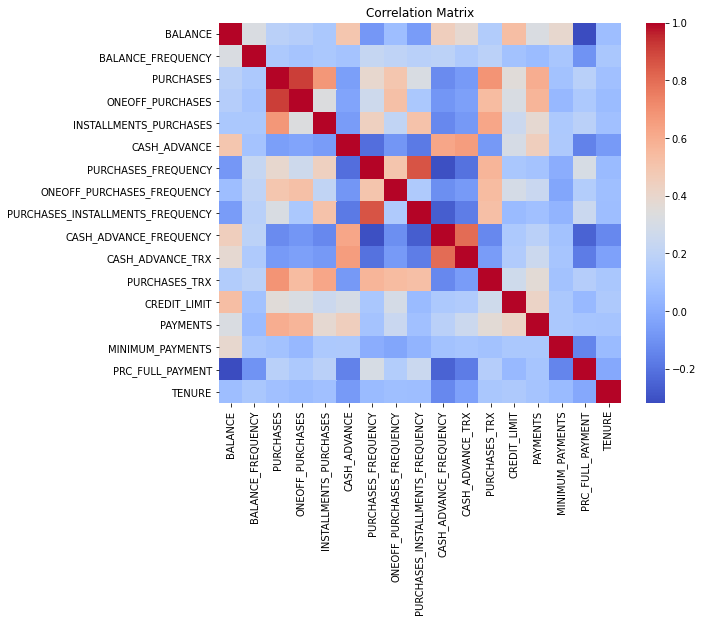

In [58]:
plt.figure(figsize=(9,7))

sns.heatmap(data.corr(),cmap='coolwarm')

plt.title('Correlation Matrix')

In [5]:
data_scaled = normalize(data)
data_scaled = pd.DataFrame(data_scaled, columns=data.columns)
data_scaled.head()

,BALANCE,BALANCE_FREQUENCY,PURCHASES,ONEOFF_PURCHASES,INSTALLMENTS_PURCHASES,CASH_ADVANCE,PURCHASES_FREQUENCY,ONEOFF_PURCHASES_FREQUENCY,PURCHASES_INSTALLMENTS_FREQUENCY,CASH_ADVANCE_FREQUENCY,CASH_ADVANCE_TRX,PURCHASES_TRX,CREDIT_LIMIT,PAYMENTS,MINIMUM_PAYMENTS,PRC_FULL_PAYMENT,TENURE
0,0.039353,0.000787,0.091790,0.000000,0.09179,0.000000,0.000160,0.000000,0.00008,0.000000,0.000000,0.001924,0.962156,0.194165,0.134230,0.00000,0.011546
1,0.293876,0.000083,0.000000,0.000000,0.00000,0.591240,0.000000,0.000000,0.00000,0.000023,0.000367,0.000000,0.642358,0.376516,0.098404,0.00002,0.001101
2,0.310798,0.000125,0.096307,0.096307,0.00000,0.000000,0.000125,0.000125,0.00000,0.000000,0.000000,0.001495,0.934206,0.077485,0.078135,0.00000,0.001495
3,0.207829,0.000079,0.186921,0.186921,0.00000,0.025661,0.000010,0.000010,0.00000,0.000010,0.000125,0.000125,0.935229,0.000000,0.107764,0.00000,0.001496
4,0.504284,0.000617,0.009867,0.009867,0.00000,0.000000,0.000051,0.000051,0.00000,0.000000,0.000000,0.000617,0.740040,0.418329,0.150963,0.00000,0.007400


# Hierarchical clustering 

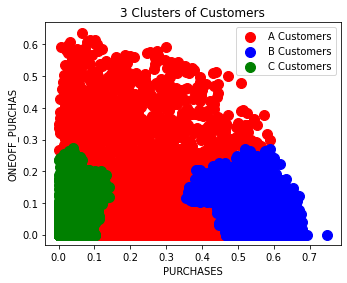

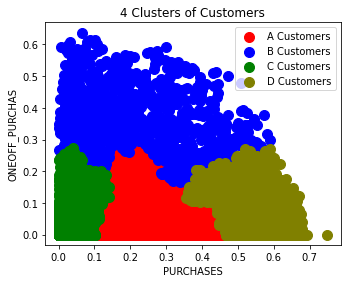

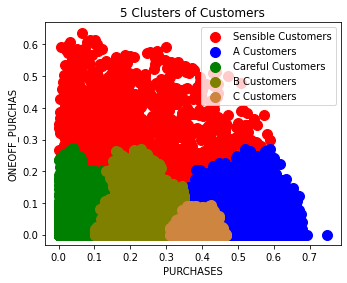

In [131]:
X = data_scaled.iloc[:, [0, 3]].values

# 3 clusters

plt.figure(figsize=(18,9))
plt.subplot2grid ((2,3),(0,0))

hierarchical = AgglomerativeClustering(n_clusters=3, affinity='euclidean', linkage='ward')  
y_kmeans = hierarchical.fit_predict(X)

plt.subplot2grid ((2,3),(0,0))

plt.scatter(X[y_kmeans == 0, 0], X[y_kmeans == 0, 1], s = 100, c = 'red', label = 'A Customers')
plt.scatter(X[y_kmeans == 1, 0], X[y_kmeans == 1, 1], s = 100, c = 'blue', label = 'B Customers')
plt.scatter(X[y_kmeans == 2, 0], X[y_kmeans == 2, 1], s = 100, c = 'green', label = 'C Customers')

plt.title('3 Clusters of Customers')
plt.xlabel('PURCHASES')
plt.ylabel('ONEOFF_PURCHAS')
plt.legend()

plt.show()

# 4 clusters

plt.figure(figsize=(18,9))
plt.subplot2grid ((2,3),(0,1))

hierarchical = AgglomerativeClustering(n_clusters=4, affinity='euclidean', linkage='ward')  
y_kmeans = hierarchical.fit_predict(X)

plt.scatter(X[y_kmeans == 0, 0], X[y_kmeans == 0, 1], s = 100, c = 'red', label = 'A Customers')
plt.scatter(X[y_kmeans == 1, 0], X[y_kmeans == 1, 1], s = 100, c = 'blue', label = 'B Customers')
plt.scatter(X[y_kmeans == 2, 0], X[y_kmeans == 2, 1], s = 100, c = 'green', label = 'C Customers')
plt.scatter(X[y_kmeans == 3, 0], X[y_kmeans == 3, 1], s = 100, c = 'olive', label = 'D Customers')

plt.title('4 Clusters of Customers')
plt.xlabel('PURCHASES')
plt.ylabel('ONEOFF_PURCHAS')
plt.legend()

# 5 clusters

plt.figure(figsize=(18,9))
plt.subplot2grid ((2,3),(0,2))

hierarchical = AgglomerativeClustering(n_clusters=5, affinity='euclidean', linkage='ward')  
y_kmeans = hierarchical.fit_predict(X)

plt.scatter(X[y_kmeans == 0, 0], X[y_kmeans == 0, 1], s = 100, c = 'red', label = 'Sensible Customers')
plt.scatter(X[y_kmeans == 1, 0], X[y_kmeans == 1, 1], s = 100, c = 'blue', label = 'A Customers')
plt.scatter(X[y_kmeans == 2, 0], X[y_kmeans == 2, 1], s = 100, c = 'green', label = 'Careful Customers')
plt.scatter(X[y_kmeans == 3, 0], X[y_kmeans == 3, 1], s = 100, c = 'olive', label = 'B Customers')
plt.scatter(X[y_kmeans == 4, 0], X[y_kmeans == 4, 1], s = 100, c = 'peru', label = 'C Customers')

plt.title('5 Clusters of Customers')
plt.xlabel('PURCHASES')
plt.ylabel('ONEOFF_PURCHAS')
plt.legend()
plt.show()

# Dendrogram

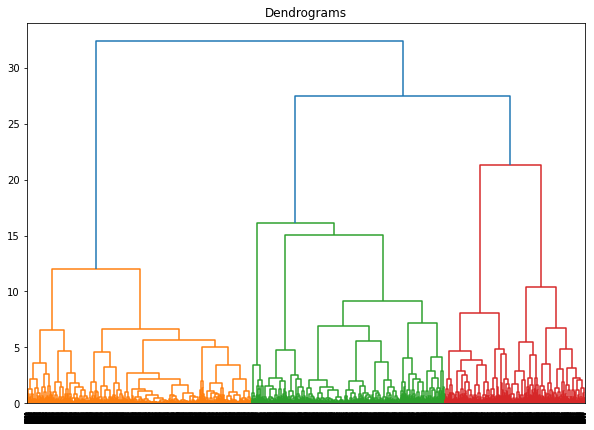

In [8]:
plt.figure(figsize=(10, 7))  
plt.title("Dendrograms")  
dend = shc.dendrogram(shc.linkage(data_scaled, method='ward'))

The x-axis contains the samples and y-axis represents the distance between these samples. The vertical line with maximum distance is the blue line and hence 

# Number of Clusters

## 1- Elbow Method

In [81]:
X = data_scaled.iloc[:, [0, 3]].values

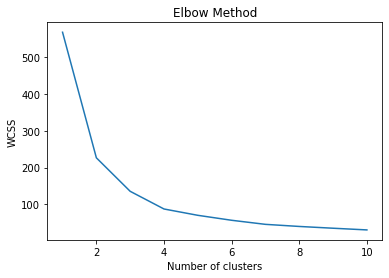

In [82]:
wcss = []
for i in range(1, 11):
    kmeans = KMeans(n_clusters = i, init = 'k-means++', random_state = 42)
    kmeans.fit(X)
    wcss.append(kmeans.inertia_)
plt.plot(range(1, 11), wcss)
plt.title('Elbow Method')
plt.xlabel('Number of clusters')
plt.ylabel('WCSS')
plt.show()

For the Elbow Methode, the best number of clusters is 3

## 2- Silhouette Scores Method

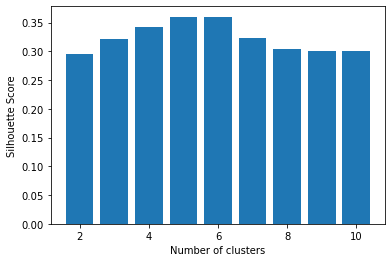

In [83]:
silhouette_scores = [] 

for n_cluster in range(2, 11):
    silhouette_scores.append(silhouette_score(data_scaled, KMeans(n_clusters = n_cluster).fit_predict(data_scaled))) 
    
# Plotting a bar graph to compare the results 
k = [2, 3, 4, 5, 6,7,8,9,10] 
plt.bar(k, silhouette_scores) 
plt.xlabel('Number of clusters', fontsize = 10) 
plt.ylabel('Silhouette Score', fontsize = 10) 
plt.show()

For the Silhouette Scores Methode, the best number of clusters are 5 & 6

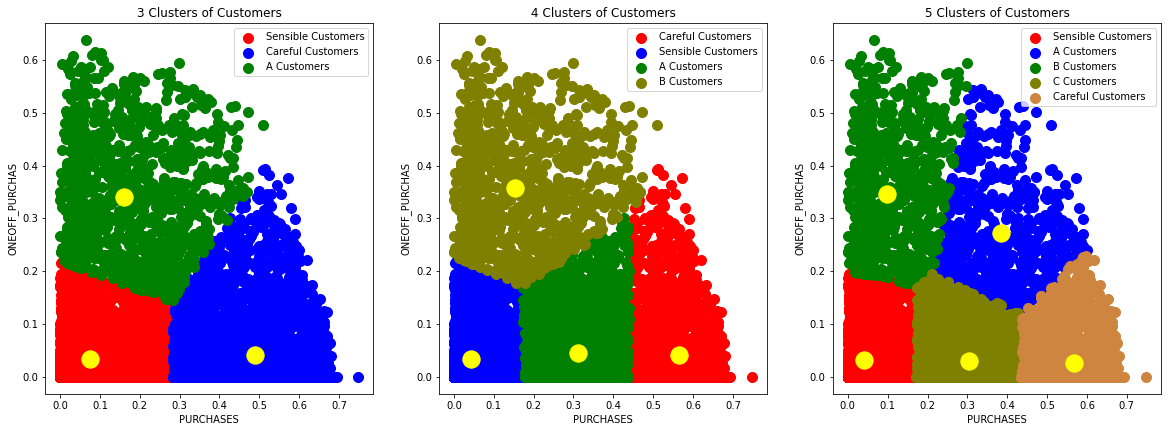

In [123]:
# 3 clusters

kmeans = KMeans(n_clusters = 3, init = 'k-means++', random_state = 42)
y_kmeans = kmeans.fit_predict(X)

plt.figure(figsize=(20,15))

plt.subplot2grid ((2,3),(0,0))

plt.scatter(X[y_kmeans == 0, 0], X[y_kmeans == 0, 1], s = 100, c = 'red', label = 'Sensible Customers')
plt.scatter(X[y_kmeans == 1, 0], X[y_kmeans == 1, 1], s = 100, c = 'blue', label = 'Careful Customers')
plt.scatter(X[y_kmeans == 2, 0], X[y_kmeans == 2, 1], s = 100, c = 'green', label = 'A Customers')

plt.title('3 Clusters of Customers')
plt.xlabel('PURCHASES')
plt.ylabel('ONEOFF_PURCHAS')
plt.legend()

plt.scatter(kmeans.cluster_centers_[:, 0], kmeans.cluster_centers_[:, 1], s=300, c='yellow', label = 'Centroids')


# 4 clusters

kmeans = KMeans(n_clusters = 4, init = 'k-means++', random_state = 42)
y_kmeans = kmeans.fit_predict(X)

plt.subplot2grid ((2,3),(0,1))

plt.scatter(X[y_kmeans == 0, 0], X[y_kmeans == 0, 1], s = 100, c = 'red', label = 'Careful Customers')
plt.scatter(X[y_kmeans == 1, 0], X[y_kmeans == 1, 1], s = 100, c = 'blue', label = 'Sensible Customers')
plt.scatter(X[y_kmeans == 2, 0], X[y_kmeans == 2, 1], s = 100, c = 'green', label = 'A Customers')
plt.scatter(X[y_kmeans == 3, 0], X[y_kmeans == 3, 1], s = 100, c = 'olive', label = 'B Customers')

plt.title('4 Clusters of Customers')
plt.xlabel('PURCHASES')
plt.ylabel('ONEOFF_PURCHAS')
plt.legend()

plt.scatter(kmeans.cluster_centers_[:, 0], kmeans.cluster_centers_[:, 1], s=300, c='yellow', label = 'Centroids')

# 5 clusters

kmeans = KMeans(n_clusters = 5, init = 'k-means++', random_state = 42)
y_kmeans = kmeans.fit_predict(X)

plt.subplot2grid ((2,3),(0,2))

plt.scatter(X[y_kmeans == 0, 0], X[y_kmeans == 0, 1], s = 100, c = 'red', label = 'Sensible Customers')
plt.scatter(X[y_kmeans == 1, 0], X[y_kmeans == 1, 1], s = 100, c = 'blue', label = 'A Customers')
plt.scatter(X[y_kmeans == 2, 0], X[y_kmeans == 2, 1], s = 100, c = 'green', label = 'B Customers')
plt.scatter(X[y_kmeans == 3, 0], X[y_kmeans == 3, 1], s = 100, c = 'olive', label = 'C Customers')
plt.scatter(X[y_kmeans == 4, 0], X[y_kmeans == 4, 1], s = 100, c = 'peru', label = 'Careful Customers')


plt.title('5 Clusters of Customers')
plt.xlabel('PURCHASES')
plt.ylabel('ONEOFF_PURCHAS')
plt.legend()

plt.scatter(kmeans.cluster_centers_[:, 0], kmeans.cluster_centers_[:, 1], s=300, c='yellow', label = 'Centroids')


plt.show()


We can define these clusters according to their purchases and ONOFF Purchas. For instance, we can name the cluster has high purchases and low ONOFF Purchas “Careful Cluster”, we can also name the cluster has low purchases and low ONOFF Purchas “Sensible Cluster” and name the others in comparison with this appellation.

# Best Model

In [125]:
hierarchical_ = AgglomerativeClustering(n_clusters=3, affinity='euclidean', linkage='ward').fit_predict(X)
kmeans_ = KMeans(n_clusters = 3, init = 'k-means++', random_state = 42).fit_predict(X)

In [128]:
kmeansSilhouette_Score = metrics.silhouette_score(X, kmeans_, metric='euclidean')
Hierarchical_Silhouette_Score = metrics.silhouette_score(X, hierarchical_, metric='euclidean')

In [129]:
Clustering_Silhouette_Scores = [ ['KMeans',kmeansSilhouette_Score],['Hierarchical',Hierarchical_Silhouette_Score]]
Clustering_Silhouette_Scores = pd.DataFrame(Clustering_Silhouette_Scores, columns=['Clustering Method', 'Silhouette Score']) 
Clustering_Silhouette_Scores.sort_values(by='Silhouette Score', ascending= False)

,Clustering Method,Silhouette Score
0,KMeans,0.562888
1,Hierarchical,0.410629


The best model is Kmeans model

# Bonus: Another validation metric

I'll choose the Spectral Clustering & I'll test this metric & compare with Hierarchical & Kmeans Clustering

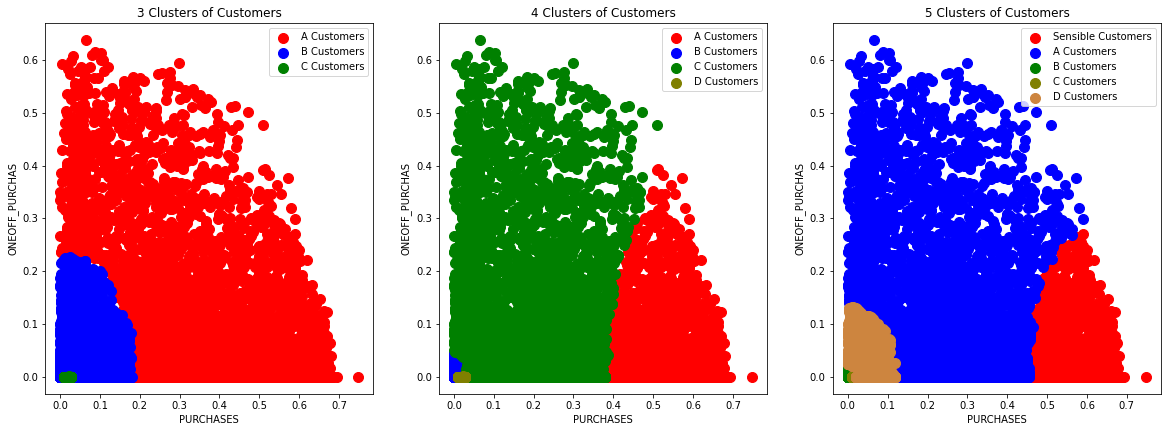

In [143]:
# 3 clusters

spectral = SpectralClustering(n_clusters=3, affinity="nearest_neighbors", assign_labels='discretize',random_state=40)
y_spectral = spectral.fit_predict(X)

plt.figure(figsize=(20,15))

plt.subplot2grid ((2,3),(0,0))

plt.scatter(X[y_spectral == 0, 0], X[y_spectral == 0, 1], s = 100, c = 'red', label = 'A Customers')
plt.scatter(X[y_spectral == 1, 0], X[y_spectral == 1, 1], s = 100, c = 'blue', label = 'B Customers')
plt.scatter(X[y_spectral == 2, 0], X[y_spectral == 2, 1], s = 100, c = 'green', label = 'C Customers')

plt.title('3 Clusters of Customers')
plt.xlabel('PURCHASES')
plt.ylabel('ONEOFF_PURCHAS')
plt.legend()

# 4 clusters

spectral = SpectralClustering(n_clusters=4, affinity="nearest_neighbors", assign_labels='discretize',random_state=40)
y_spectral = spectral.fit_predict(X)


plt.subplot2grid ((2,3),(0,1))

plt.scatter(X[y_spectral == 0, 0], X[y_spectral == 0, 1], s = 100, c = 'red', label = 'A Customers')
plt.scatter(X[y_spectral == 1, 0], X[y_spectral == 1, 1], s = 100, c = 'blue', label = 'B Customers')
plt.scatter(X[y_spectral == 2, 0], X[y_spectral == 2, 1], s = 100, c = 'green', label = 'C Customers')
plt.scatter(X[y_spectral == 3, 0], X[y_spectral == 3, 1], s = 100, c = 'olive', label = 'D Customers')

plt.title('4 Clusters of Customers')
plt.xlabel('PURCHASES')
plt.ylabel('ONEOFF_PURCHAS')
plt.legend()

# 5 clusters

spectral = SpectralClustering(n_clusters=5, affinity="nearest_neighbors", assign_labels='discretize',random_state=40)
y_spectral = spectral.fit_predict(X)


plt.subplot2grid ((2,3),(0,2))

plt.scatter(X[y_spectral == 0, 0], X[y_spectral == 0, 1], s = 100, c = 'red', label = 'Sensible Customers')
plt.scatter(X[y_spectral == 1, 0], X[y_spectral == 1, 1], s = 100, c = 'blue', label = 'A Customers')
plt.scatter(X[y_spectral == 2, 0], X[y_spectral == 2, 1], s = 100, c = 'green', label = 'B Customers')
plt.scatter(X[y_spectral == 3, 0], X[y_spectral == 3, 1], s = 100, c = 'olive', label = 'C Customers')
plt.scatter(X[y_spectral == 4, 0], X[y_spectral == 4, 1], s = 100, c = 'peru', label = 'D Customers')


plt.title('5 Clusters of Customers')
plt.xlabel('PURCHASES')
plt.ylabel('ONEOFF_PURCHAS')
plt.legend()

plt.show()


In [139]:
hierarchical_ = AgglomerativeClustering(n_clusters=3, affinity='euclidean', linkage='ward').fit_predict(X)
kmeans_ = KMeans(n_clusters = 3, init = 'k-means++', random_state = 42).fit_predict(X)
spectral_ = SpectralClustering(n_clusters=3, affinity="nearest_neighbors", assign_labels='discretize',
                                      random_state=40).fit_predict(data_scaled)

In [140]:
kmeansSilhouette_Score = metrics.silhouette_score(X, kmeans_, metric='euclidean')
Hierarchical_Silhouette_Score = metrics.silhouette_score(X, hierarchical_, metric='euclidean')
Spectral_Silhouette_Score = metrics.silhouette_score(X, spectral_, metric='euclidean')

In [141]:
Clustering_Silhouette_Scores = [ ['KMeans',kmeansSilhouette_Score],['Hierarchical',Hierarchical_Silhouette_Score], ['Spectral', Spectral_Silhouette_Score]]
Clustering_Silhouette_Scores = pd.DataFrame(Clustering_Silhouette_Scores, columns=['Clustering Method', 'Silhouette Score']) 
Clustering_Silhouette_Scores.sort_values(by='Silhouette Score', ascending= False)

,Clustering Method,Silhouette Score
0,KMeans,0.562888
1,Hierarchical,0.410629
2,Spectral,0.193915


Kmean clustering still the best model for our exemple